In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from xgboost import XGBRegressor

In [2]:
dataset = pd.read_csv('Train.csv')

In [3]:
dataset.shape

(8523, 12)

In [4]:
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Handling the missing Values
# Mean - Average Value
# Mode - Most Frequent Value

mean = dataset['Item_Weight'].mean()

In [8]:
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(mean)

In [9]:
mode = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [10]:
 mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [11]:
missing_values = dataset['Outlet_Size'].isnull()

In [12]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
dataset.loc[missing_values, 'Outlet_Size'] = dataset.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
# Data Analysis
dataset.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [16]:
# Numerical Plot
sns.set()

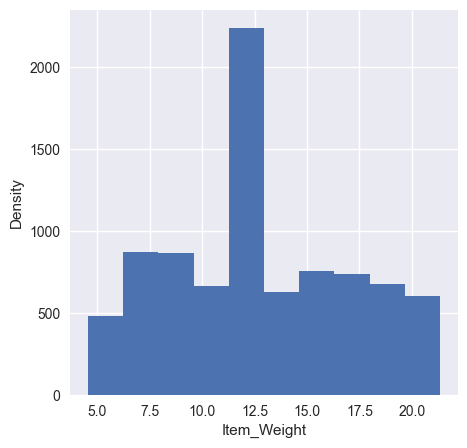

In [17]:
# Item_weigth distribution
plt.figure(figsize=(5,5))
plt.xlabel('Item_Weight')
plt.ylabel('Density')
plt.hist(dataset['Item_Weight'])
plt.show()

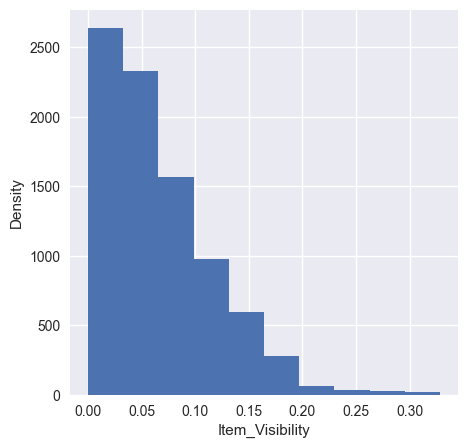

In [18]:
plt.figure(figsize=(5,5))
plt.xlabel('Item_Visibility')
plt.ylabel('Density')
plt.hist(dataset['Item_Visibility'])
plt.show()

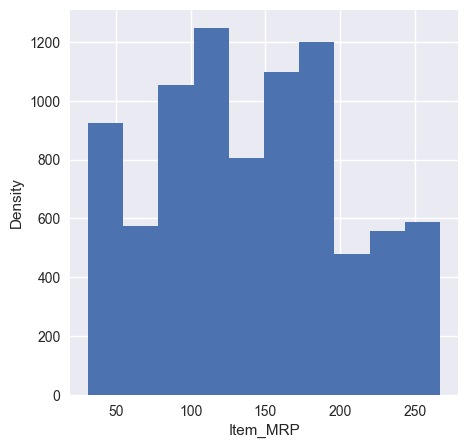

In [19]:
plt.figure(figsize=(5,5))
plt.xlabel('Item_MRP')
plt.ylabel('Density')
plt.hist(dataset['Item_MRP'])
plt.show()

C:\Users\GAURAV PRAJAPATI\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:245: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


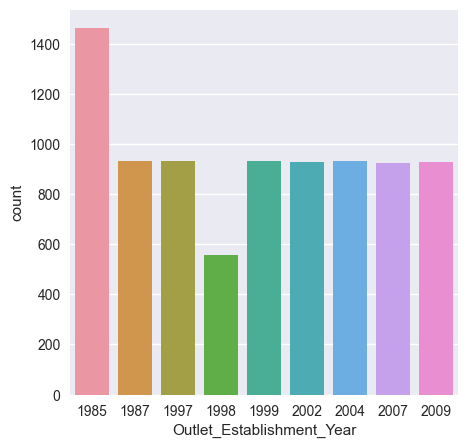

In [20]:
# Outlet_Establishment_Year count_plot
plt.figure(figsize=(5,5))
dataset['Outlet_Establishment_Year'] = dataset['Outlet_Establishment_Year'].astype('category')
sns.countplot(x = 'Outlet_Establishment_Year',data= dataset)
plt.show()

C:\Users\GAURAV PRAJAPATI\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:245: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


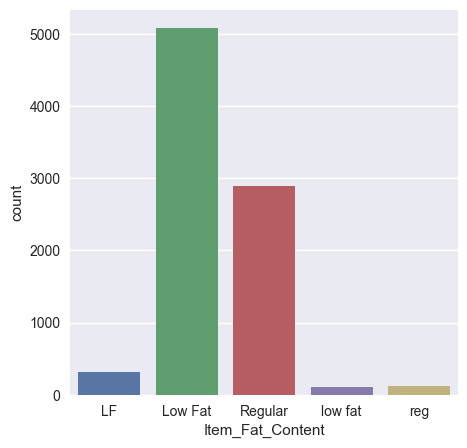

In [21]:
# Categorical Feature
plt.figure(figsize=(5,5))
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].astype('category')
sns.countplot(x='Item_Fat_Content', data=dataset)
plt.show()

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                8523 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(2), float64(4), object(6)
memory usage: 683.2+ KB


C:\Users\GAURAV PRAJAPATI\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:245: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


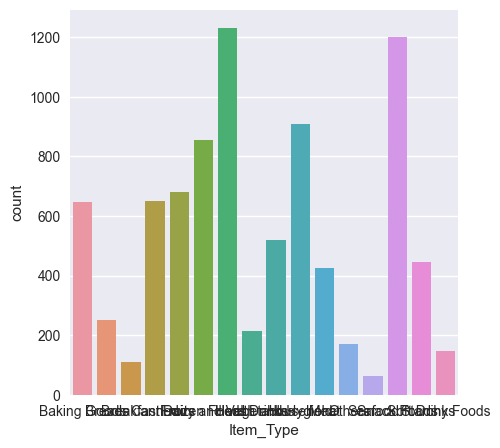

In [23]:
plt.figure(figsize=(5,5))
dataset['Item_Type'] = dataset['Item_Type'].astype('category')
sns.countplot(x='Item_Type', data=dataset)
plt.show()

In [24]:
# Data Preprocessing
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year  \
0                      1999   
1                      2009   
2                      1999   
3                      1998   
4                      1987   

                                         Outlet_Size Outlet_Location_Type  \
0                                             Medium               Tier 1   
1                                             Medium               Tier 3   
2                                             Medium               Tier 1   
3  Outlet_Type Grocery Store Supermarket Type1 Su...               Tier 3   
4                                               High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [25]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [26]:
dataset.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [27]:
dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [28]:
# Label Encoding
encoder = LabelEncoder()

In [29]:
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])

In [30]:
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              156         9.30          Low Fat         0.016047   
1                8         5.92          Regular         0.019278   
2              662        17.50          Low Fat         0.016760   
3             1121        19.20          Regular         0.000000   
4             1297         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year  \
0                      1999   
1                      2009   
2                      1999   
3                      1998   
4                      1987   

                                         Outlet_Size Outlet_Location_Type  \
0                                             Medium               Tier 1   
1                                             Medium               Tier 3   
2                                             Medium               Tier 1   
3  Outlet_Type Grocery Store Supermarket Type1 Su...               Tier 3   
4                                               High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   int32   
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                8523 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(3), float64(4), int32(1), object(4)
memory usage: 592.2+ KB


In [32]:
dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   int32   
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   int32   
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                8523 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(2), float64(4), int32(2), object(4)
memory usage: 617.1+ KB


In [34]:
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])

In [35]:
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Item_Type'])

In [36]:
dataset['Outlet_Establishment_Year'] = encoder.fit_transform(dataset['Outlet_Establishment_Year'])

In [40]:
dataset['Outlet_Size'] = dataset['Outlet_Size'].astype(str)
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'].astype(str))

In [41]:
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])

In [42]:
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(6), int64(2)
memory usage: 599.4 KB


In [44]:
dataset.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  4                          4            1   
1   48.2692                 14                          8            1   
2  141.6180                 10                          4            1   
3  182.0950                  6                          3            2   
4   53.8614                  9                          1            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [50]:
X = dataset.drop('Item_Outlet_Sales', axis=1)
Y = dataset['Item_Outlet_Sales']

In [51]:
X.shape

(8523, 11)

In [52]:
Y.shape

(8523,)

In [54]:
X = np.array(X)
Y = np.array(Y)

In [55]:
type(X)

numpy.ndarray

In [56]:
type(Y)

numpy.ndarray

In [57]:
# Splitting the dataset into training and Testing set
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2, random_state=0)

In [58]:
model = XGBRegressor()

In [59]:
model.fit(train_X, train_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
r2_error = metrics.r2_score(train_Y, model.predict(train_X))

In [62]:
print("r square Error: " , r2_error)

r square Error:  0.873422535019875


In [63]:
r2_error = metrics.r2_score(test_Y, model.predict(test_X))

In [64]:
print("r square Error: " , r2_error)

r square Error:  0.47581162618550965
